In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# df = pd.read_csv("C:/Users/HP/Downloads/creditcard.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df['Time'].describe()

,Time
count,284807.000000
mean,94813.859575
std,47488.145955
min,0.000000
25%,54201.500000
50%,84692.000000
75%,139320.500000
max,172792.000000


In [11]:
print ("Fraudulent")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Legitimate")
print (df.Amount[df.Class == 0].describe())

Fraudulent
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Legitimate
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


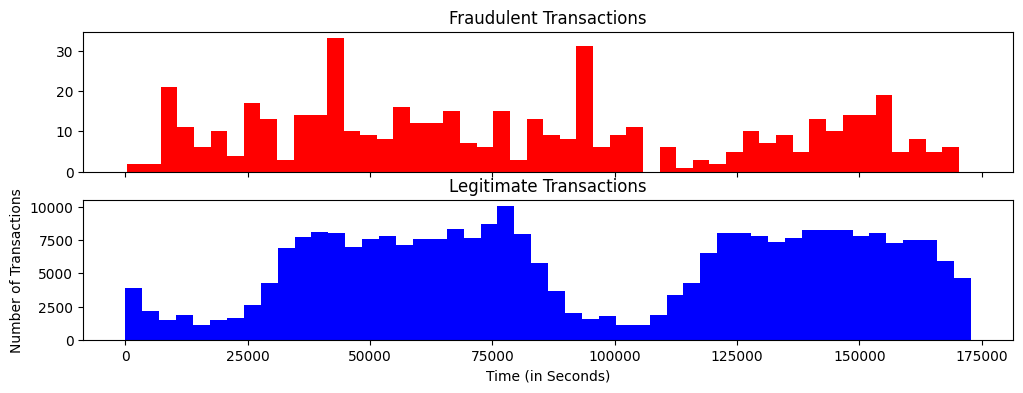

In [12]:
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 4))

# Set number of bins
bins = 50

# Plot histogram for Fraud transactions (Class == 1) with red color
ax1.hist(df.Time[df.Class == 1], bins=bins, color='red')
ax1.set_title('Fraudulent Transactions')

# Plot histogram for Normal transactions (Class == 0) with red color
ax2.hist(df.Time[df.Class == 0], bins=bins, color='blue')
ax2.set_title('Legitimate Transactions')

# Set labels for the entire plot
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')

# Display the plot
plt.show()

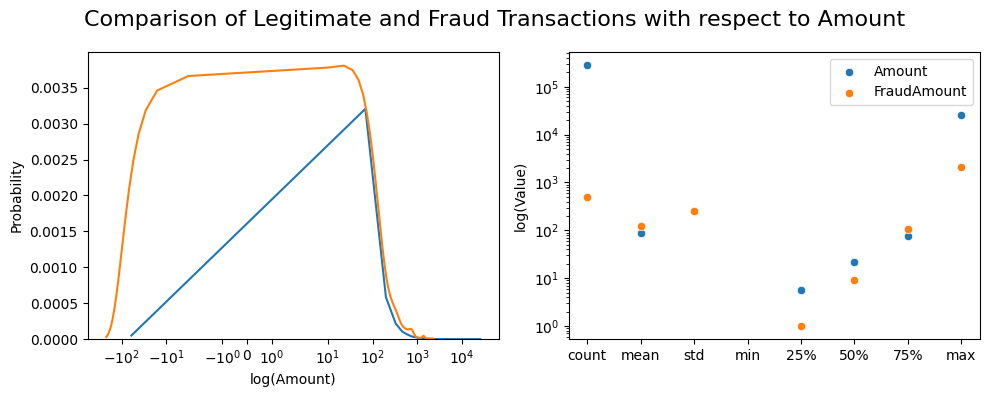

In [13]:
# Exploring distribution of
fig,ax = plt.subplots(1,2,figsize = (10,4))
fig.suptitle('Comparison of Legitimate and Fraud Transactions with respect to Amount', fontsize=16)
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Amount',ax = ax[0])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='FraudAmount',ax = ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(df[df['Class'] == 0]['Amount'].describe(), label='Amount',ax = ax[1])
sns.scatterplot(df[df['Class'] == 1]['Amount'].describe(), label='FraudAmount',ax = ax[1])
ax[1].set_yscale('log')
ax[1].set_xlabel('')
ax[1].set_ylabel('log(Value)')
plt.tight_layout()
plt.show()

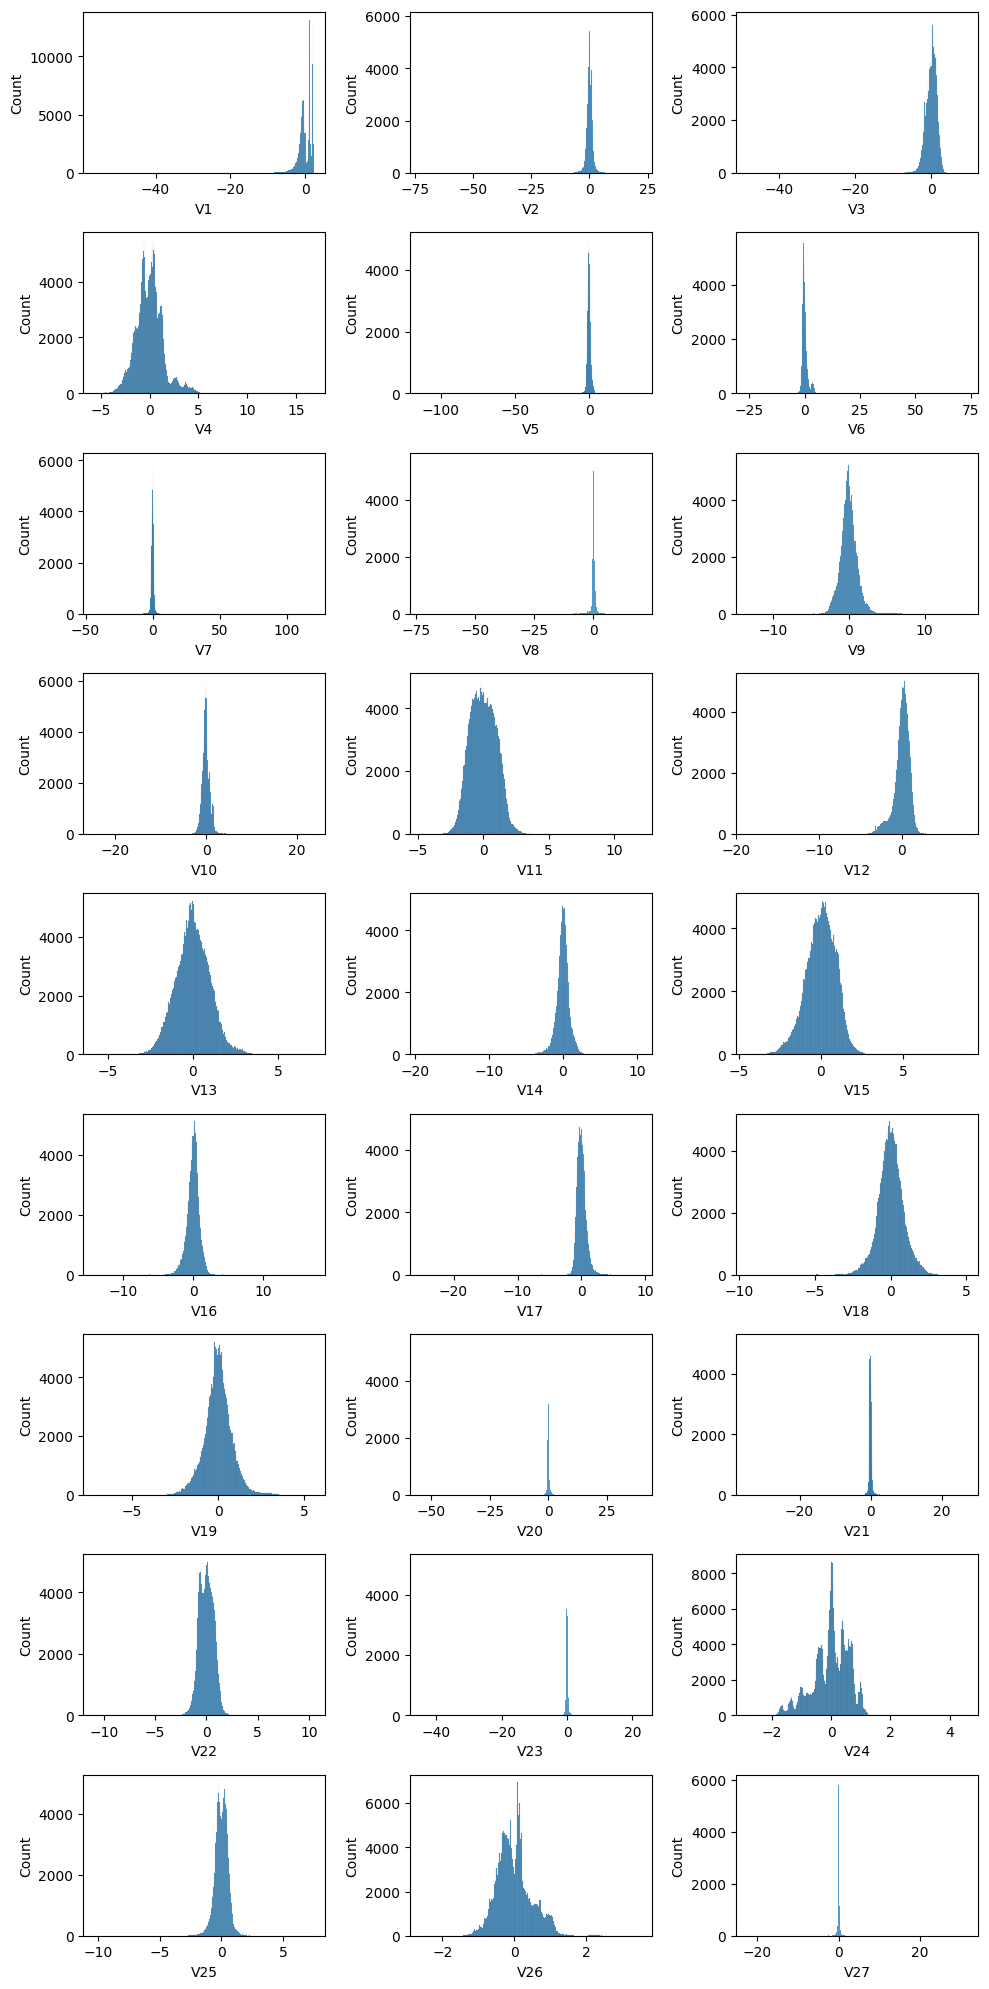

In [14]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(9,3,figsize=(10,20))
ax = ax.flatten()
for i,column in enumerate(df.columns[1:28]):
    sns.histplot(data = df, x = df[column],ax = ax[i])
plt.tight_layout()
plt.show()

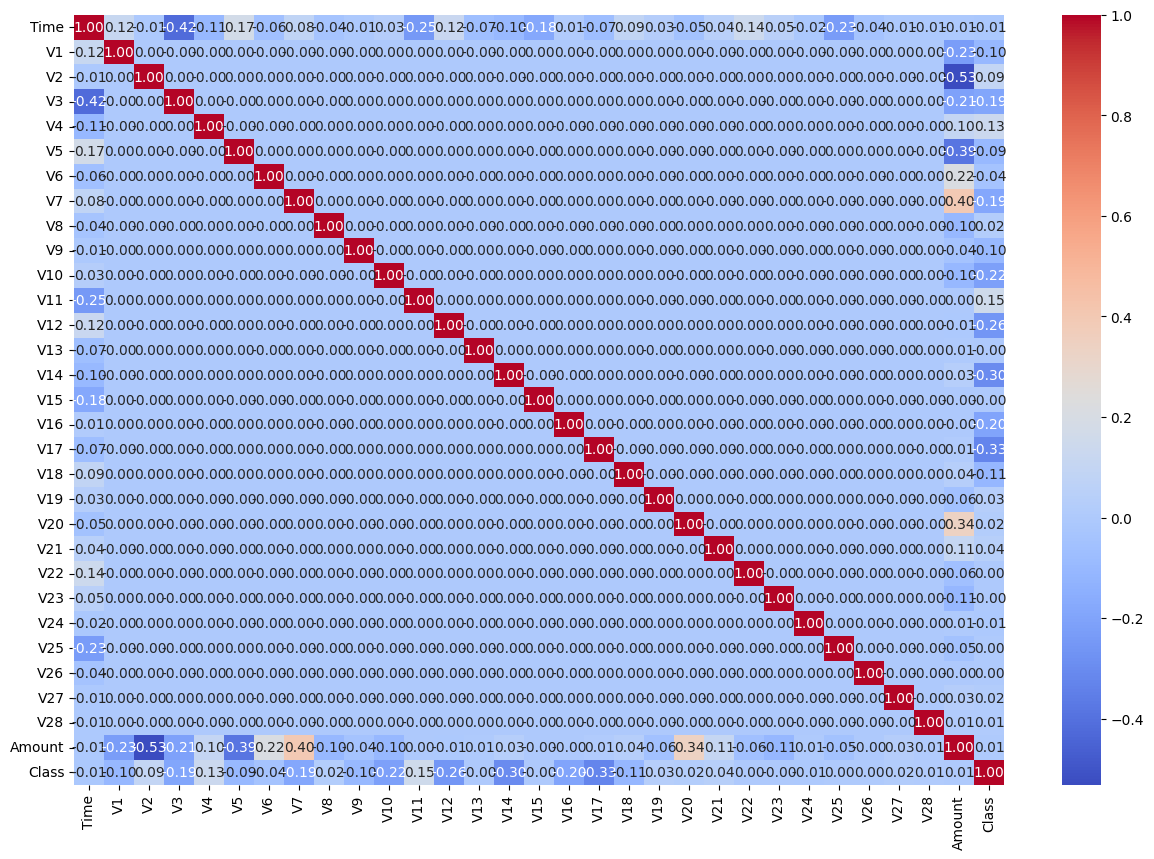

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Class
0    284315
1       492
Name: count, dtype: int64


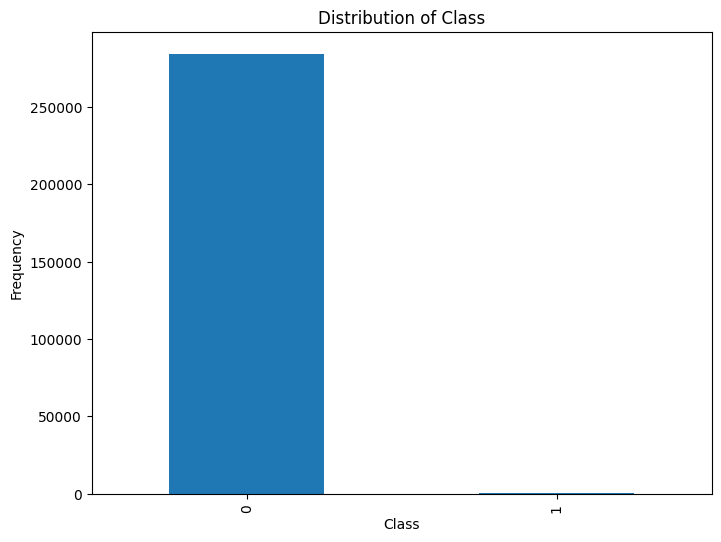

In [16]:
print(df['Class'].value_counts())
plt.figure(figsize=(8, 6))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Split into train and test sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify= y, shuffle=True)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Logistic Regression on original dataset
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



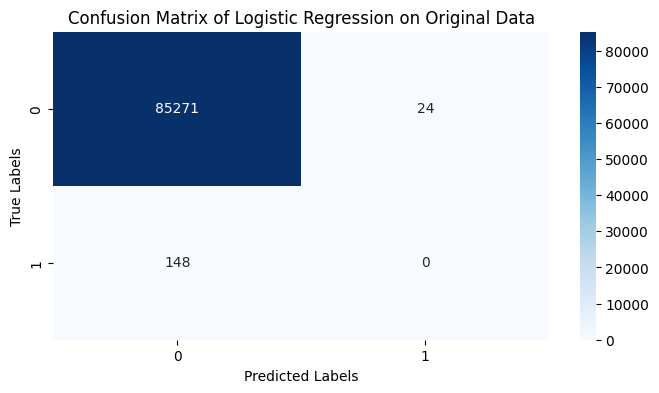

In [15]:
# Confusion matrix of LR on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Designing the confusion matrix for SVM (Linear)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression on Original Data")
plt.show()

In [16]:
# Naive Bayes on original dataset
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [18]:
y_pred = nb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.79      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.88      0.55     85443
weighted avg       1.00      0.98      0.99     85443



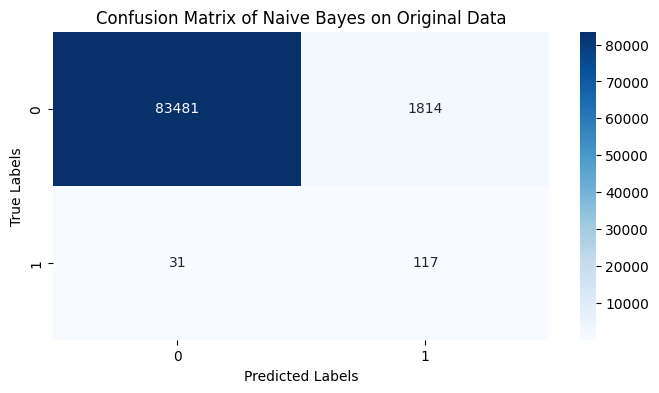

In [19]:
# Confusion matrix of LR on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Naive Bayes on Original Data")
plt.show()

In [20]:
# Fitting ensemble learning on original dataset
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=123)

In [21]:
# Classification report of Ensemble learning on original data
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.70      0.79       148

    accuracy                           1.00     85443
   macro avg       0.96      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



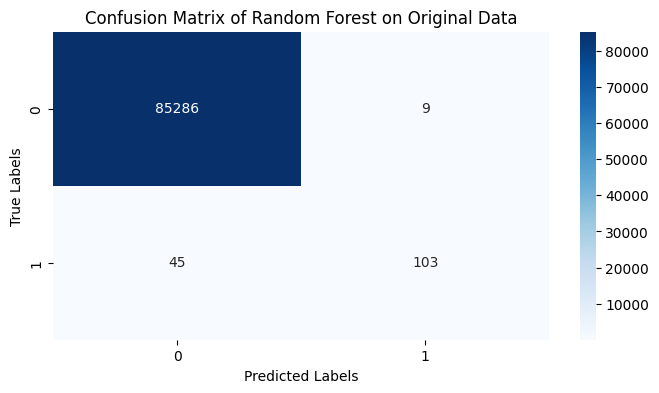

In [22]:
# Confusion matrix of Ensemble learning on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Random Forest on Original Data")
plt.show()

In [23]:
# Hybrid learning models
# Using information gain as feature selection method
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [24]:
# Train a Random Forest classifier on the selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)
lr_model = LogisticRegression(random_state = 1234)

In [25]:
rf_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)

LogisticRegression(random_state=1234)

In [27]:
rf_pred = rf_model.predict(X_test_selected)
lr_pred = lr_model.predict(X_test_selected)

In [28]:
hybrid_pred = []
for i in range(len(X_test_selected)):
  votes = lr_pred[i] + rf_pred[i]
  hybrid_pred.append(1 if votes >=2 else 0)

In [29]:
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)
print("Classification report of Hybrid Model:")
print(classification_report(y_test, hybrid_pred))

Hybrid Model Accuracy: 0.9992275552122467
Classification report of Hybrid Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.57      0.72       148

    accuracy                           1.00     85443
   macro avg       0.98      0.79      0.86     85443
weighted avg       1.00      1.00      1.00     85443



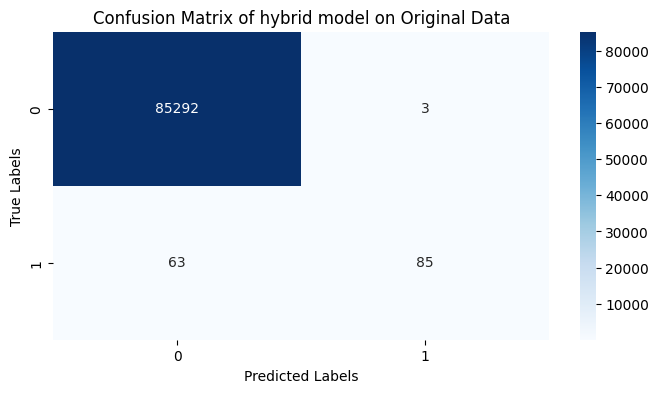

In [30]:
# Confusion matrix of hybrid on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, hybrid_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of hybrid model on Original Data")
plt.show()

In [31]:
# Deep learing model on original data
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.0138
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9995 - loss: 0.0029
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9993 - loss: 0.0028
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9995 - loss: 0.0020
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9995 - loss: 0.0017
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 9/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9995 - loss: 0.0016
Epoch 10/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9996 - loss: 0.0013


In [32]:
# Evaluation of deep learning model on original data
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print("Deep learning model")
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Deep learning model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994265182636377


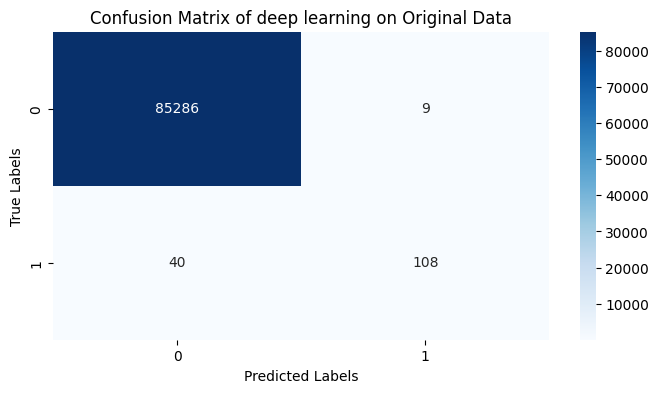

In [33]:
# Confusion matrix of Deep learning on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of deep learning on Original Data")
plt.show()

###**Under sampling**

In [34]:
# Undersampling Dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test_scaled, y_test)

In [35]:
# Logistic regression on undersampled data
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [36]:
y_pred = logreg_model.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       148
           1       0.96      0.86      0.91       148

    accuracy                           0.91       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.92      0.91      0.91       296



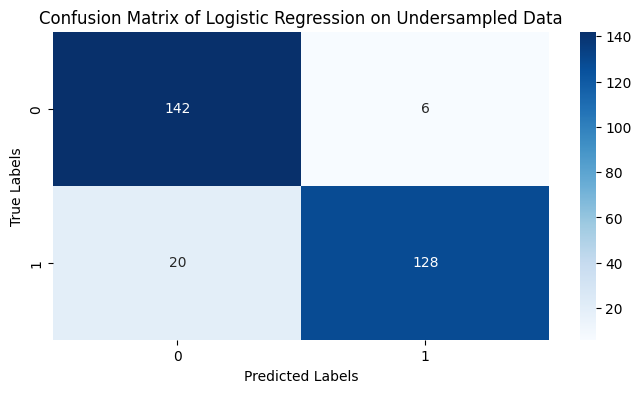

In [37]:
# Confusion matrix of LR on undersampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Designing the confusion matrix for SVM (Linear)
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression on Undersampled Data")
plt.show()

In [38]:
# Fitting naive bayes on undersampled dataset
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [39]:
y_pred = nb_model.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       148
           1       0.99      0.85      0.92       148

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



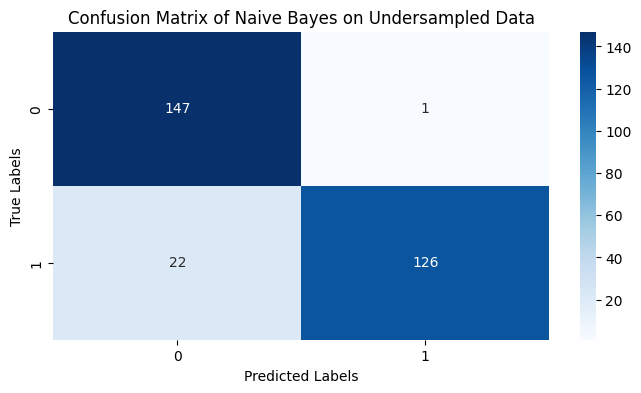

In [40]:
# Confusion matrix of NB on undersampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Naive Bayes on Undersampled Data")
plt.show()

In [41]:
#Ensemble learning on undersampled dataset
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1234)

In [42]:
y_pred = rf_classifier.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       148
           1       0.98      0.86      0.92       148

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



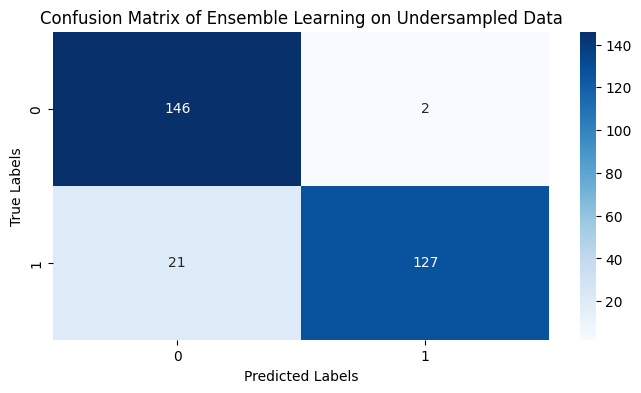

In [43]:
# Confusion matrix of Ensemble Learning on undersampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Ensemble Learning on Undersampled Data")
plt.show()

In [44]:
# Hybrid learning in undersampled data
# Hybrid learning models
# Using information gain as feature selection method
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_resampled)

In [45]:
# Train a Random Forest classifier on the selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)
lr_model = LogisticRegression(random_state = 1234)

In [46]:
rf_model.fit(X_train_resampled, y_train_resampled)
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=1234)

In [47]:
rf_pred = rf_model.predict(X_test_resampled)
lr_pred = lr_model.predict(X_test_resampled)

In [48]:
hybrid_pred = []
for i in range(len(X_test_resampled)):
  votes = lr_pred[i] + rf_pred[i]
  hybrid_pred.append(1 if votes >=2 else 0)

In [49]:
hybrid_accuracy = accuracy_score(y_test_resampled, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)
print("Classification report of Hybrid Model:")
print(classification_report(y_test_resampled, hybrid_pred))

Hybrid Model Accuracy: 0.918918918918919
Classification report of Hybrid Model:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       148
           1       0.98      0.85      0.91       148

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



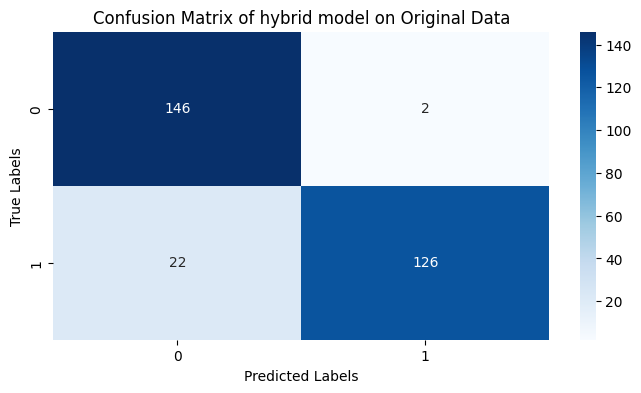

In [50]:
# Confusion matrix of Hybrid model on undersampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, hybrid_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of hybrid model on Original Data")
plt.show()

In [51]:
# Deep learing model on undersampled data
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7361 - loss: 0.4181
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1846 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1477 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1131
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.0898
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.0790 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9671 - loss: 0.0922 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0578 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9708 - loss: 0.0742 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0451 


In [52]:
# Evaluation of deep learning model on original data
y_pred = (model.predict(X_test_resampled) > 0.5).astype(int)
print("Deep learning model")
print(classification_report(y_test_resampled, y_pred))
#print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test_resampled, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Deep learning model
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       148
           1       0.96      0.86      0.91       148

    accuracy                           0.91       296
   macro avg       0.92      0.91      0.91       296
weighted avg       0.92      0.91      0.91       296

Accuracy: 0.9121621621621622


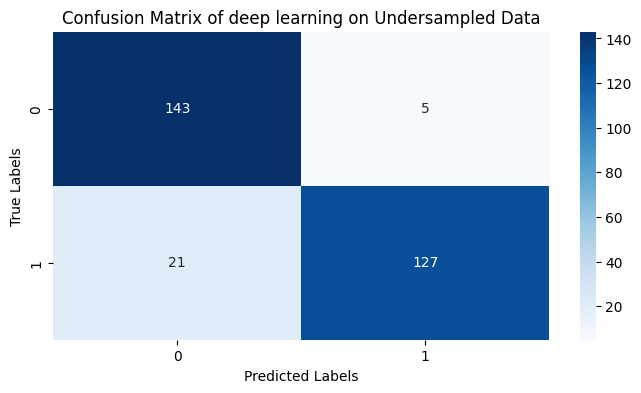

In [53]:
# Confusion matrix of Deep learning on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of deep learning on Undersampled Data")
plt.show()

###**Over sampling Data**

In [7]:
# Oversampling Dataset
smote = SMOTE(random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_scaled, y_test)

In [55]:
# Fitting Logistic Regression on Oversampled data
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [56]:
y_pred = logreg_model.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     85295
           1       0.98      0.86      0.91     85295

    accuracy                           0.92    170590
   macro avg       0.93      0.92      0.92    170590
weighted avg       0.93      0.92      0.92    170590



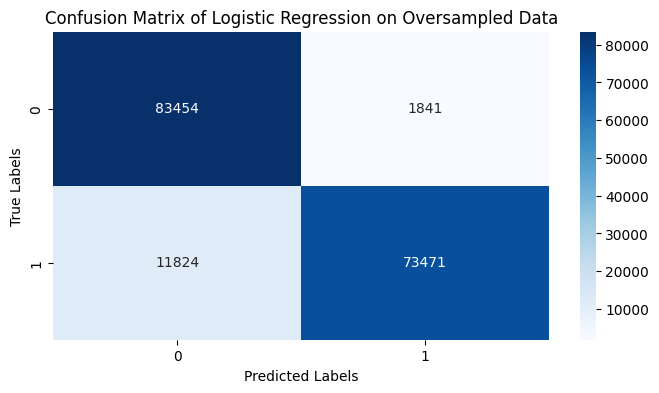

In [57]:
# Confusion matrix of LR on oversampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Logistic Regression on Oversampled Data")
plt.show()

In [58]:
# Fitting naive bayes on oversampled dataset
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [59]:
y_pred = nb_model.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85295
           1       0.97      0.83      0.90     85295

    accuracy                           0.90    170590
   macro avg       0.91      0.90      0.90    170590
weighted avg       0.91      0.90      0.90    170590



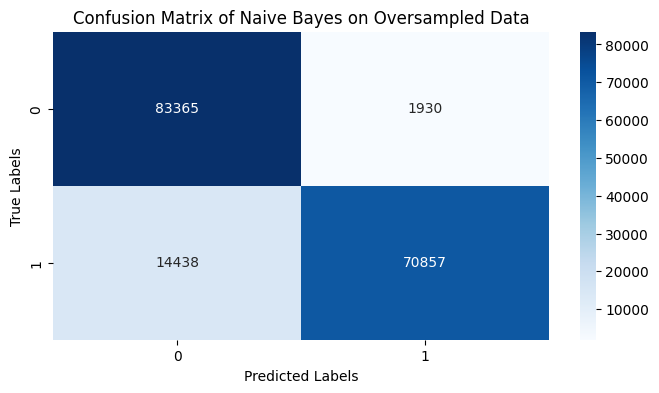

In [60]:
# Confusion matrix of LR on oversampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Naive Bayes on Oversampled Data")
plt.show()

In [61]:
#Ensemble learning on oversampled dataset
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1234)

In [62]:
y_pred = rf_classifier.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85295
           1       1.00      0.80      0.89     85295

    accuracy                           0.90    170590
   macro avg       0.92      0.90      0.90    170590
weighted avg       0.92      0.90      0.90    170590



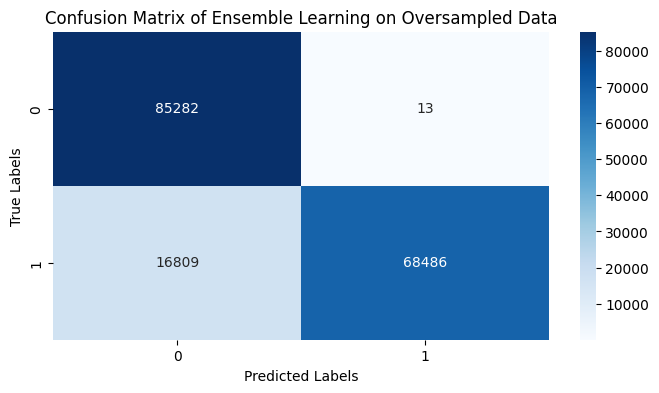

In [63]:
# Confusion matrix of Ensemble Learning on oversampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Ensemble Learning on Oversampled Data")
plt.show()

In [8]:
# Hybrid learning in oversampled data
# Hybrid learning models
# Using information gain as feature selection method
selector = SelectKBest(score_func=mutual_info_classif, k=20)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_resampled)

In [9]:
# Train a Random Forest classifier on the selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234)
lr_model = LogisticRegression(random_state = 1234)

In [10]:
rf_model.fit(X_train_resampled, y_train_resampled)
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=1234)

In [11]:
rf_pred = rf_model.predict(X_test_resampled)
lr_pred = lr_model.predict(X_test_resampled)

In [12]:
hybrid_pred = []
for i in range(len(X_test_resampled)):
  votes = lr_pred[i] + rf_pred[i]
  hybrid_pred.append(1 if votes >=2 else 0)

In [13]:
hybrid_accuracy = accuracy_score(y_test_resampled, hybrid_pred)
print("Hybrid Model Accuracy:", hybrid_accuracy)
print("Classification report of Hybrid Model:")
print(classification_report(y_test_resampled, hybrid_pred))

Hybrid Model Accuracy: 0.9013423999062079
Classification report of Hybrid Model:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85295
           1       1.00      0.80      0.89     85295

    accuracy                           0.90    170590
   macro avg       0.92      0.90      0.90    170590
weighted avg       0.92      0.90      0.90    170590



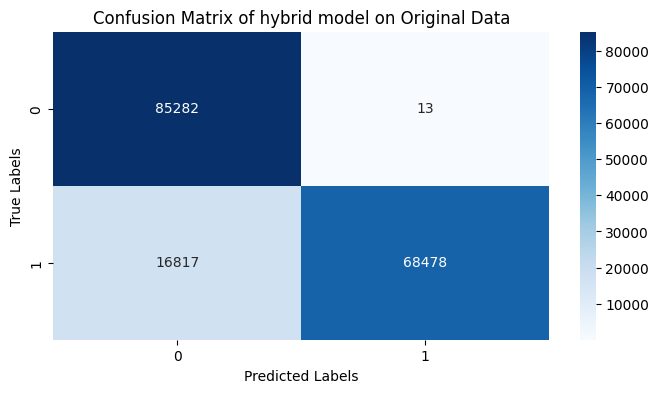

In [14]:
# Confusion matrix of Hybrid model on oversampled data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, hybrid_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of hybrid model on Original Data")
plt.show()

In [15]:
# Deep learing model on oversampled data
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9916 - loss: 0.0264
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.9991 - loss: 0.0047
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9992 - loss: 0.0030
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9994 - loss: 0.0024
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9996 - loss: 0.0021
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9997 - loss: 0.0018
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9997 - loss: 0.0014
Epoch 9/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9998 - loss: 0.0013
Epoch 10/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9997 - loss: 0.0015


In [16]:
# Evaluation of deep learning model on original data
y_pred = (model.predict(X_test_resampled) > 0.5).astype(int)
print("Deep learning model")
print(classification_report(y_test_resampled, y_pred))
#print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test_resampled, y_pred))

5331/5331 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Deep learning model
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85295
           1       1.00      0.80      0.89     85295

    accuracy                           0.90    170590
   macro avg       0.91      0.90      0.90    170590
weighted avg       0.91      0.90      0.90    170590

Accuracy: 0.8975555425288704


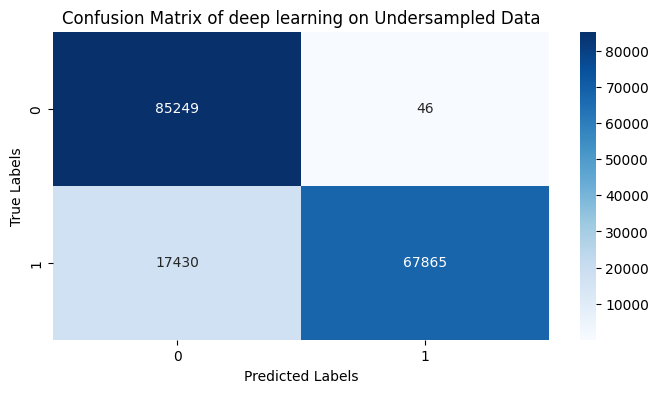

In [17]:
# Confusion matrix of Deep learning on original data
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of deep learning on Undersampled Data")
plt.show()